# HW4
Self-Organizing Map Network for the IRIS and Sonar datasets.

## 基本概念

### Competitive Learning (競爭式學習)

![](https://i.imgur.com/7r6jYG8.png)

競爭式學習基本理念是在未經過標示的樣本中學找相似特質、規則或關係，再將這些有共同特徵的樣本聚集成同類。假設在輸出的神經元間存在競爭關係，也就是說在所有神經元終止會有一個被激發成為Active State(輸出為1)，而其他則會被抑制成Inactive State(輸出為0)，當競爭完成後，只有獲勝者會進行學習，因此這種學習方式又稱為"winner-take-all"。

### Self-Organization in Neural Networks

利用Kohonen model架構找出群集的中心(如同K-means演算法所做的)，而Kohonen net就是使用競爭式學習訓練而成。

![](https://i.imgur.com/yK1NQi5.png)

上圖是一維的Kohonen model，，在此網路中共有K個類神經元，假設$w^t_k(n)x(n) = max_{i=1,2,...,k}(w_i^t(n)x(n))$，那麼第k個類神經元就是winner，在獨活性競爭中，其權重調整方式如下
$$w_j(n+1) = \left\{
\begin{aligned}
w_j(n) + \eta(x(n) - w_j(n)) \  if\   j=k  \\
w_j(n) \  if\   j\neq k  \\
\end{aligned}
\right.$$
其中$x$維輸入向量，$w_j$是連結第j類神經元的權值向量，$\eta$是學習率。

因為通常每個權重值向量會被正規化成長度為1的單位向量，因此選擇winner的公式可以改成$||x-w_k||<||x-w_j||$

SOM原理來自於生物學大腦的側向交互原理(Mexican hat function)，相近的神經元之間遵循下列規則：
* 以winner為圓心，對鄰近神經元表現出興奮性側反饋。
* 以winner為圓心，對較遠神經元表現出抑制性側反饋。
$$w_j(n+1) = \left\{
\begin{aligned}
w_j(n) + \eta(x(n) - w_j(n)) \  if\   j\in N_c(n)  \\
w_j(n) \  if\   j\notin N_c(n)  \\
\end{aligned}
\right.$$

示意圖：
![](https://i.imgur.com/oprKU5X.png)

領域$N_c(n)$的半徑會以線性下降方式縮小，但不可以降為0，當$r(N_c) < 1$時，是為獨活性競爭。


### Summary of theSelf-Organization in Neural Networks Algorithm

$x(n) = [x_1(n), x_2(n), ..., x_p(n)]^T$: input vector

$w_j = [ w_{j1}, w_{j2}, ..., w_{jp}]^T$: weight vector，須和x(n)同維度、0-1的值，且為單位向量。

$\eta$: learning-rate parameter，學習率參數應隨時間而調整，可以是線性遞減、指數遞減或和時間n成反比等。這裡設定$\eta(t) = \eta _0 exp(-\frac{t}{\lambda}),\ t=1,2,3,..., \ \lambda=\frac{N}{ln(\eta _0)}$，初始學習速率$\eta _0$須預先決定，介於0-1之間，通常會設定靠近1一些。

$\sigma(t)=\sigma _0exp(-\frac{t}{\lambda}),\ t=1,2,3,..., \ \lambda=\frac{N}{ln(\sigma _0)}$: $\sigma _0$是初始範圍(全部矩陣範圍)，$\lambda$是時間常數，是先決定的總迴圈次數除上初始範圍取對數的值。$\sigma(t)$當這個公式輸出非整數時，四捨五入為整數。

$\theta(t) = exp(-\frac{dist^2}{2\sigma^2(t)})$: $dist$是該node和winner的距離，離winner越近的node，調整權重越多。

注：一般來說將向量正規化成長度為1的單位向量，然後計算$w_j^Tx$可以直接找到$x$和哪個權重值最匹配，也可以選擇不計算內積，而是計算$x$和$w_j$的距離，最短者得勝。
(下面使用計算內積的方式)

* Step 1: 先自行定義出神經元矩陣，每個神經元都有一個和input vector同維度的向量，其值介於0-1之間，稱為weight vector，初始化權重，先任意設定權值(0~1之間)，之後會透過更新而自動調整，但所有初始權值向量都應該不同。
* Step 2: 隨機選擇一個訓練樣本，$x=[x_1, x_2, ..., x_p]$，正規化後與權重做內積，找出winner。
* Step 3: 根據範圍函數的距離值，調整距離內的權值向量$w_j(n+1) = \left\{
\begin{aligned}
w_j(n) + \theta (n)\eta(x(n) - w_j(n)) \  if\   j\in N_c(n)  \\
w_j(n) \  if\   j\notin N_c(n)  \\
\end{aligned}
\right.$

    權重更新後也須做正規化處理。
* Step 4: 回到step 2，進行下一輪。這裡要注意，完成一個樣本並不會直接跳到下一輪，而是重複完成所有樣本訓練後再跳下一輪，因此所有樣本都要做多次迴圈。

## 資料集說明

### Iris Data Set(Iris, Setosa vs. Versicolor vs. Virginica)
 dataset: http://archive.ics.uci.edu/ml/datasets/Iris
 * Number of Instances: 150
 * Number of Attributes: 4

### Connectionist Bench (Sonar, Mines vs. Rocks) Data Set
 dataset: http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)
 * Number of Instances: 208
 * Number of Attributes: 60
 

## 實作

### 連接Google Drive

In [43]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls '/content/drive/My Drive/Pattern_Recognition/HW4'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
HW4.ipynb  sonar.all-data


### 讀取資料

####  Iris

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()
c = 3
# print(iris.keys())
data = iris['data'].tolist()
for i in range(len(data)):
  data[i].append(iris['target'][i])

data = np.array(data).astype(np.float)
print('number of data:', len(data))
print(data[0])
print(data[-1])

number of data: 150
[5.1 3.5 1.4 0.2 0. ]
[5.9 3.  5.1 1.8 2. ]


#### Sonar

In [44]:
file = '/content/drive/My Drive/Pattern_Recognition/HW4/sonar.all-data'
data = []
c = 2
with open(file,'r') as f:
  for line in f:
    features = line.strip('\n').split(',')
    data.append(features)
for i in data:
  if i[-1] == 'R':
    i[-1] = 0
  else:
    i[-1] = 1
data = np.array(data).astype(np.float)  
print('number of data:', len(data))
print(data[0])
print(data[-1])

number of data: 208
[0.02   0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111
 0.1609 0.1582 0.2238 0.0645 0.066  0.2273 0.31   0.2999 0.5078 0.4797
 0.5783 0.5071 0.4328 0.555  0.6711 0.6415 0.7104 0.808  0.6791 0.3857
 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744
 0.051  0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324
 0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.018  0.0084 0.009  0.0032
 0.    ]
[0.026  0.0363 0.0136 0.0272 0.0214 0.0338 0.0655 0.14   0.1843 0.2354
 0.272  0.2442 0.1665 0.0336 0.1302 0.1708 0.2177 0.3175 0.3714 0.4552
 0.57   0.7397 0.8062 0.8837 0.9432 1.     0.9375 0.7603 0.7123 0.8358
 0.7622 0.4567 0.1715 0.1549 0.1641 0.1869 0.2655 0.1713 0.0959 0.0768
 0.0847 0.2076 0.2505 0.1862 0.1439 0.147  0.0991 0.0041 0.0154 0.0116
 0.0181 0.0146 0.0129 0.0047 0.0039 0.0061 0.004  0.0036 0.0061 0.0115
 1.    ]


### Self-Organization in Neural Networks

In [0]:
def normal_data(data):
  for i in range(data.shape[0]):
    tmp = np.sum(np.multiply(data[i][0:w_len], data[i][0:w_len]))
    data[i][0:w_len] /= np.sqrt(tmp)
  return data

def normal_w(w):
  for i in range(w.shape[0]):
    tmp = np.sum(np.multiply(w[i], w[i]))
    w[i] /= np.sqrt(tmp)
  return w


In [0]:
import numpy as np
import math

# 矩陣大小
size = c
# 權重向量大小
w_len = data.shape[1]-1
# 訓練次數
num = 100
# 初始學習速率
learn0 = 0.5
# 初始鄰近神經元範圍
sigma0 = size
# 隨機初始化權重
w = np.zeros((size, w_len), dtype=float)
for i in range(size):
    tmp = np.random.rand(w_len)
    w[i] = tmp
# data_ = data
# 正規化資料集1
data_ = normal_data(data)

# 正規化資料集2
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data_ = data
# sc.fit(data_[:,0:w_len])
# data_[:,0:w_len] = sc.transform(data_[:,0:w_len])


In [0]:
import numpy

# 歐式距離
def euclidean(v1, v2):
  return numpy.sqrt(numpy.sum(numpy.square(np.array(v1) - np.array(v2))))

# 學習速率變化函式
def learn(t):
  l = num / math.log(learn0)
  return learn0 * math.exp(t/l)

# 鄰近神經元範圍函式
def sigma(t):
  l = num / math.log(sigma0)
  return sigma0 * math.exp(-t/l)

# 調整權重大小
def theta(sigma_t, v1, v2):
  return math.exp(-euclidean(v1, v2)*euclidean(v1, v2)/(2*sigma_t*sigma_t))

In [0]:
for t in range(num):
  # 隨機選擇資料
  np.random.shuffle(data_)
  # 調整學習速率
  l = learn(t)
  # 調整權重
  for d in data_:
    j = np.argmax(np.dot(w, d[0:w_len]))
    w[j] = w[j] + l * (d[0:w_len] - w[j])
    # 權重正規化
    w = normal_w(w)

In [0]:
res = []
for d in data_:
  j = np.argmax(np.dot(w, d[0:w_len]))
  res.append(j)
result = {}
for i in range(len(res)):
  if not result.get(int(res[i])):
    result.setdefault(int(res[i]), [i])
  else:
    result[int(res[i])].append(i)

### 畫圖

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


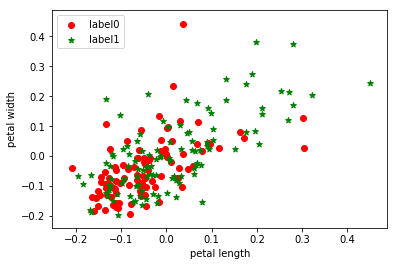

In [99]:
import matplotlib.pyplot as plt  
import numpy as np  
X = data
# 繪製資料分佈圖
x0 = []
x1 = []
x2 = []
for i in range(data_.shape[0]):
  if(X[i][-1] == 0):
    x0.append(X[i])
  elif(X[i][-1] == 1):
    x1.append(X[i])
  elif(X[i][-1] == 2):
    x2.append(X[i])
x1 = np.array(x1)
x2 = np.array(x2)
if x0 != []:
  x0 = np.array(x0)
  plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0') 
if x1 != []:
  x1 = np.array(x1)
  plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1') 
if x2 != []:
  x2 = np.array(x2)
  plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


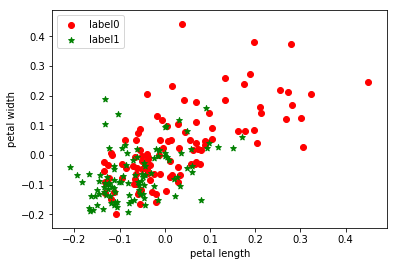

In [100]:
# 繪製分類結果
x0 = []
x1 = []
x2 = []
for i in range(data_.shape[0]):
  if(res[i] == 0):
    x0.append(X[i])
  elif(res[i] == 1):
    x1.append(X[i])
  elif(res[i] == 2):
    x2.append(X[i])

x1 = np.array(x1)
x2 = np.array(x2)
if x0 != []:
  x0 = np.array(x0)
  plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0') 
if x1 != []:
  x1 = np.array(x1)
  plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1') 
if x2 != []:
  x2 = np.array(x2)
  plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  

### 計算錯誤率

In [0]:
label = {}
for i in range(data_.shape[0]):
  if not label.get(data_[i][-1]):
    label.setdefault(data_[i][-1], [i])
  else:
    label[data_[i][-1]].append(i)

In [0]:
classify = {}
for i in range(data_.shape[0]):
  if not classify.get(res[i]):
    classify.setdefault(res[i], [i])
  else:
    classify[res[i]].append(i)

In [103]:
if classify.get(0):
  print('classify0')
  print('label0', len(set(label[0]) & set(classify[0])))
  print('label1', len(set(label[1]) & set(classify[0])))
  if label.get(2):
    print('label2', len(set(label[2]) & set(classify[0])))
if classify.get(1):
  print('classify1')
  print('label0', len(set(label[0]) & set(classify[1])))
  print('label1', len(set(label[1]) & set(classify[1])))
  if label.get(2):
    print('label2', len(set(label[2]) & set(classify[1])))
if classify.get(2):
  print('classify2')
  print('label0', len(set(label[0]) & set(classify[2])))
  print('label1', len(set(label[1]) & set(classify[2])))
  if label.get(2):
    print('label2', len(set(label[2]) & set(classify[2])))

classify0
label0 37
label1 68
classify1
label0 60
label1 43


## 參考資料
* [Pattern Recognition課堂講義](https://drphototw.wixsite.com/wujl/teaching)
* [SOM](http://ccy.dd.ncu.edu.tw/~chen/course/Neural/ch3/SOM.pdf)
* [Introducing the Self-Organizing Map (SOM)](https://medium.com/@CCstruggled/som-som-introducing-the-self-organizing-map-som-d212534160e0)
